![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
# SUGERIDO: Descomenta la siguiente linea de código si requieres instalar las libreías básicas utilizadas en este notebook
# Si requieres incluir más librerías puedes agregarlas al archivo Semana 4\requirements.txt
# !pip install -r requirements.txt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [5]:
df.shape

(541462, 3)

<Axes: >

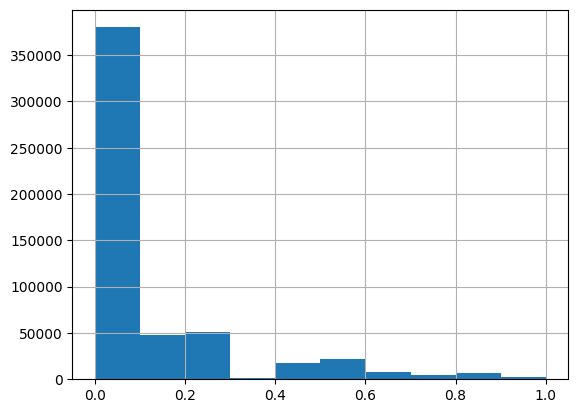

In [6]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [7]:
# Separación de variable de interés (y)
y = df.target
y.describe()

,target
count,541462.000000
mean,0.102991
std,0.196979
min,0.000000
25%,0.000000
50%,0.000000
75%,0.166667
max,1.000000


In [8]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [9]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X

,comment_text
0,What are you talking about? What group do Pete...
1,"NO!, Let him, we need a Conservative government."
2,"Perhaps he took the ""power out of the Cardinal..."
3,"As always, yours is dripping with sarcasm, whi..."
4,The dirty little secret is that the price rang...
...,...
541457,"You wrote: ""Both parties campaigned explicitly..."
541458,Nowadays. there sure seem to be a lot of credi...
541459,We are lucky wealth filters down to the poor i...
541460,You are half right. Both nature and humans can...


## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1
vectorizer = CountVectorizer(lowercase=False)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = Ridge()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

mse_unigram = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse_unigram:.4f}")

Error cuadrático medio (MSE): 0.0272


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2
vectorizer = CountVectorizer(ngram_range=(3, 3), lowercase=False)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = Ridge()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

mse_trigram = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse_trigram:.4f}")

Error cuadrático medio (MSE): 0.0368


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

### TfidfVectorizer:

TfidfVectorizer es una técnica de tokenización que convierte texto en valores numéricos, basándose en la relevancia de cada palabra dentro de un conjunto de documentos. Su funcionamiento se apoya en dos conceptos clave: la **frecuencia de término (TF)** y la **frecuencia inversa de documento (IDF)**. El TF mide cuántas veces aparece una palabra en un documento específico, mientras que el IDF evalúa qué tan común o rara es esa palabra en el conjunto total de documentos. Así, TfidfVectorizer otorga un mayor peso a las palabras que son frecuentes en un documento pero poco comunes en el resto, y asigna un peso bajo a palabras demasiado comunes como "el", "de" o "y".

**Por ejemplo**, si "reloj" aparece varias veces en algunos comentarios pero es poco frecuente en el conjunto total de textos, tendrá un peso alto en esos comentarios, mientras que palabras como "el" tendrán un peso muy bajo, sin importar cuántas veces aparezcan.

A diferencia de CountVectorizer, que simplemente cuenta cuántas veces aparece cada palabra sin considerar su relevancia, TfidfVectorizer permite identificar mejor cuáles términos realmente aportan información valiosa. Esto mejora la representación de los datos, ya que resalta las palabras más importantes y minimiza el impacto de las palabras más comunes.

**Ventajas:**
La principal ventaja de TfidfVectorizer es que mejora la calidad de los modelos predictivos al centrarse en palabras significativas, ayudando a que los algoritmos de aprendizaje automático capten mejor los patrones relevantes del texto.

**Desventajas:**
Su desventaja es que puede implicar un mayor costo computacional, ya que, además de contar palabras, debe calcular y ajustar los pesos TF-IDF.

Sin embargo, en problemas de clasificación o predicción basados en texto, utilizar TfidfVectorizer suele ofrecer mejores resultados, ya que evita que palabras comunes y poco informativas dominen el análisis.

Scikit-learn Developers. (2024). 3.4.2.2. Text feature extraction [online]. Available at: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
(Documentación oficial de CountVectorizer y TfidfVectorizer)

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 4
vectorizer = TfidfVectorizer(lowercase=False )
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = Ridge()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

mse_tfid = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse_tfid:.4f}")

Error cuadrático medio (MSE): 0.0181


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

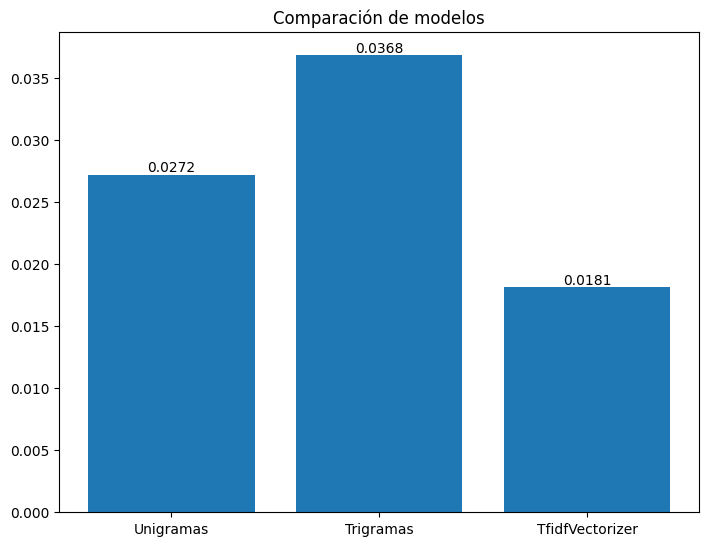

In [14]:
# Celda 5 Código para graficos y tablas comparativas
# Datos
ejeX = ['Unigramas', 'Trigramas', 'TfidfVectorizer']
ejeY = [mse_unigram, mse_trigram, mse_tfid]

# Crear figura y ejes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")

# Crear gráfico de barras
bars = ax.bar(ejeX, ejeY)

# Función para agregar labels centrados en cada barra
def addlabels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2,  height, f'{height:.4f}',
                ha='center',  va='bottom')

# Agregar los labels
addlabels(bars, ax)

# Mostrar gráfico
plt.show()

**Conclusiones:**
Al comparar los resultados obtenidos al utilizar diferentes parámetros y métodos para preprocesar los comentarios obtenemos variaciones significativas usando el mismo modelo, en el primer caso usamos unigramas y utilizando una regresión tipo ridge obtenemos un error cuadrático medio de 0.0272. Para ver el efecto del tipo de grama en la segunda iteración del modelo utilizamos trigramas, este modelo obtuvo un error cuadrático medio mayor, de 0.0368, es decir que el modelo empeoro su desempeño. En este caso el uso de trigramas para entender las palabras y su relación no mejora la comprensión de la toxicidad de los comentarios. Por último utilizamos otra versión del preprocesamiento de los comentarios usando en vez de countVEctorizer, TfidfVectorizer. TfidfVEctorizer se encarga de calcular la importancia de una palabra y no solo depende del número de veces que se encuentra, esta aproximación a la tokenización demuestra un mejor desempeño del modelo. Al utilizarla en el modelo obtenemos un error cuadrático medio de 0.0181, de manera que comprobamos la información investigada, el uso de TfidfVectorizer aumenta la precision del modelo al encontrar de manera más adecuada las palabras más importantes para definir la toxicidad de los comentarios.